In [2]:
# set the envoiroment
import pandas as pd
import numpy as np 

# Figure 1
- (a) Dependence of ATP synthesis flux (-Jp; normalized by maximal catabolic flux, L∙∆Gc flux ratios through the two branches (Jp1/Jp  and Jp2/Jp), variable flux-ratio stoichiometry n = (-Jp/Jc) and thermodynamic efficiency (η) on the counteracting force ratio X=∆Gp/∆Gc. The equation (9) was used for the simulation of -Jp/(L∙∆Gc) as function of force ratio X; the equation (8) and (9) were used for the calculation of -Jp/Jc; the equation (3) and (9) were used for the calculation of Jp1/Jp; The equation (5) and (9) were used for the calculation of Jp2/Jp; The equation η=-Jp/Jc∙X was used for simulation of η as function of force ratio X. 
- (b) Flux ratio stoichiometry versus ATP synthesis. Increase of the variable stoichiometry n= (-Jp/Jc) with increasing ATP flux. At a force ratio of 0.75 the output flux of ATP synthesis reverts to ATP degradation, while catabolism continues. This corresponds to a car still using gasoline to try to move forward and upward but being forced back down due to gravity. Consequently, the stoichiometry and the thermodynamic efficiency become negative. At the force ratio of 0.83 also catabolism inverts. At this and higher force ratios, the model simulates reverse operation where ATP hydrolysis would drive reversal of catabolism, which is not often realistic. Results of computations for two parallel catabolic pathways with φ= 0.2, n1= 1, n2= 2, L= 1, ∆Gc= 1, Lpl=0. 

In [3]:
x = np.linspace(0,1,401)
figure_1 = pd.DataFrame({"X":x})
figure_1["-Jp/L∆Gc"] = 0
figure_1["Jc/L∆Gc"] = 0
figure_1["-Jp/Jc"] = 0
figure_1["Jp1/Jp"] = 0
figure_1["Jp2/Jp"] = 0
figure_1["n"] = 0
figure_1["η"] = 0
φ = 0.2
n1 = 1
n2 = 2
L2= 1
L1=1
for i in range(len(figure_1)):
    # The formula -Jp/(L∆Gc)= (1-φ)∙n1∙(1-n1∙X)+φ∙n2-φ∙(n2 )^2∙X was used for calculation of -Jp/(L∆Gc).
    figure_1["-Jp/L∆Gc"].iloc[i] = (1-φ)*n1*(1-n1*figure_1["X"].iloc[i]) + φ*n2*(1-n2*figure_1["X"].iloc[i])
    # The formula Jc/(L∆Gc)= (1-φ)∙(1-n1∙X)+φ∙(1-n2∙X) was used for calculations of Jc/(L∆Gc).
    figure_1["Jc/L∆Gc"].iloc[i] = (1-φ)*(1-n1*figure_1["X"].iloc[i]) + φ*(1-n2*figure_1["X"].iloc[i])
    # The formula -Jp/Jc = (-Jp/L∆Gc)/(Jc/L∆Gc) was used for calculation of -Jp/Jc.
    figure_1["-Jp/Jc"].iloc[i] = (figure_1["-Jp/L∆Gc"].iloc[i])/(figure_1["Jc/L∆Gc"].iloc[i])
    # The formula -Jp1/Jp =(1-φ)∙n1∙(1-n1∙X)/(-Jp/L∆Gc) was used for calculation of -Jp1/Jp.
    figure_1["Jp1/Jp"].iloc[i] = (1-φ)*n1*(1-n1*figure_1["X"].iloc[i])/figure_1["-Jp/L∆Gc"].iloc[i]
   # The formula -Jp2/Jp =φ∙n2∙(1-n2∙X)/(-Jp/L∆Gc) was used for calculation of -Jp2/Jp
    figure_1["Jp2/Jp"].iloc[i] = φ*n2*(1-n2*figure_1["X"].iloc[i])/figure_1["-Jp/L∆Gc"].iloc[i]
    # The formula n = ((1-φ)∙n1∙(1-n1∙X)+φ∙n2∙(1-n_2∙X))/((1-φ)∙(1-n1∙X)+φ∙(1-n2∙X)) was used for calculation of n.
    figure_1["n"].iloc[i] = ((1-φ)*n1*(1-n1*figure_1["X"].iloc[i])+φ*n2*(1-n2*figure_1["X"].iloc[i]))/((1-φ)*(1-n1*figure_1["X"].iloc[i])+φ*(1-n2*figure_1["X"].iloc[i]))
    # The formula η = -Jp/Jc∙X was used to caluculate of η.
    figure_1["η"].iloc[i] = figure_1["-Jp/Jc"].iloc[i]*figure_1["X"].iloc[i]

C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


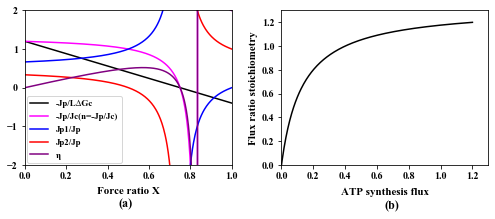

In [11]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np
cm = 1/2.54
# fig,axs = plt.subplots(3,1,figsize = (8.5*cm,26*cm))

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (18*cm,8.2*cm))
# formatter = matplotlib.ticker.FormatStrFormatter('%1.3f')#This one is used to set the accurate of y axis
# ax.yaxis.set_major_formatter(formatter)
ax1.plot(figure_1["X"],figure_1["-Jp/L∆Gc"],color='black',label = "-Jp/L∆Gc")
ax1.plot(figure_1["X"],figure_1["-Jp/Jc"],color='magenta',label = "-Jp/Jc(n=-Jp/Jc)")
ax1.plot(figure_1["X"],figure_1["Jp1/Jp"],color='blue',label = "Jp1/Jp")
ax1.plot(figure_1["X"],figure_1["Jp2/Jp"],color='red',label = "Jp2/Jp")
# ax.plot(figure_1["X"],figure_1["n"],color='green',label = "n")
ax1.plot(figure_1["X"],figure_1["η"],color='purple',label = "η")

ax1.legend(prop={"size":9}, loc='lower left', borderaxespad=0.2)


ax1.text(0.45, -3.1, '(a)',  fontsize = 12, color ="black")
ax1.set_xticks(np.arange(-0.0, 1.1, step=0.2))
ax1.set_ylim(-2.0, 2)
ax1.set_xlim (0,1.0)
ax1.set_xlabel("Force ratio X", fontsize = 11, fontweight = "bold",labelpad=6)
plt.yticks(fontsize = 10,fontweight = "bold")
plt.xticks(fontsize = 10,fontweight = "bold")
ax2.plot(figure_1["-Jp/L∆Gc"],figure_1["n"],color='black')
ax2.set_xticks(np.arange(-0.0, 1.3, step=0.2))
ax2.set_yticks(np.arange(-0.0, 1.3, step=0.2))

ax2.text(0.65, -0.37, '(b)',  fontsize = 12, color ="black")
ax2.set_ylim(0.0, 1.3)
ax2.set_xlim (0,1.3)
ax2.set_xlabel("ATP synthesis flux", fontsize = 11, fontweight = "bold",labelpad=6)
ax2.set_ylabel("Flux ratio stoichiometry", fontsize = 11, fontweight = "bold",labelpad=4)

plt.yticks(fontsize = 10,fontweight = "bold")
plt.xticks(fontsize = 10,fontweight = "bold")
plt.tight_layout()
plt.savefig('Figure 1', dpi=1000)
plt.show()

# Figure 2. Gear shifting 
- (a) Normalized ATP synthesis flux versus force ratio at three magnitudes of the phenomenological stoichiometry Z, as well as (green line) their sum total and (purple line) ATP synthesis for optimal ‘variomatic gear shifting’ with respect to maximal ATP synthesis flux. The equation (16) was used for calculation of -Jp/(L∙∆Gc) as function of force ratio X. In these simulations, q=0.9 and various values of Z (0.5, 1, 2, and the optimal variomatic Z=q^2/X) were used as indicated. -Jp/(L∙∆Gc)total was calculated as the sum of three. 
- (b) Flux ratio stoichiometry as a function of the force ratio. The equation (19) was used for simulation of n. 
- (c) Flux ratio stoichiometry versus ATP synthesis flux. 

In [5]:
x = np.linspace(0,1,401)
figure_2 = pd.DataFrame({"X":x})


figure_2["-Jp/LΔGc for Z = 0.5"] = 0
figure_2["-Jp/LΔGc for Z = 1"] = 0
figure_2["-Jp/LΔGc for Z = 2"] = 0
figure_2["-Jp/LΔGc for Z = 4"] = 0
figure_2["-Jp/LΔGc total"] = 0
figure_2["-Jp/LΔGc for Optimal Z = q/2X"] = 0
# figure_2["Z(maximal ATP syntheis flux) = q/2X"] = 0

figure_2["-Jp/Jc for Z = 0.5"] = 0
figure_2["-Jp/Jc for Z = 1"] = 0
figure_2["-Jp/Jc for Z = 2"] = 0
figure_2["-Jp/Jc for Z = 4"] = 0
figure_2["-Jp/Jc total"] = 0
figure_2["-Jp/Jc for Optimal Z = q/2X"] = 0
# figure_2["Z(maximal ATP syntheis flux) = q/2X"] = 0
q = 0.9
Z1 = 0.5
Z2 = 1
Z3 = 2
Z4 = 4
for i in range(len(figure_2)):
    # The formula -Jp/L∆Gc= L∙∆Gc∙q∙z∙(1-z/q∙X)/(L∙∆Gc) = q∙z∙(1-z/q∙X) = z∙(q-z∙X) was used to calculate -Jp/LΔGc
    figure_2["-Jp/Jc for Z = 0.5"].iloc[i] = (Z1*q-Z1*Z1*figure_2["X"].iloc[i])/(1-q*Z1*figure_2["X"].iloc[i])
    figure_2["-Jp/Jc for Z = 1"].iloc[i] = (Z2*q-Z2*Z2*figure_2["X"].iloc[i])/(1-q*Z2*figure_2["X"].iloc[i])
    figure_2["-Jp/Jc for Z = 2"].iloc[i] = (Z3*q-Z3*Z3*figure_2["X"].iloc[i])/(1-q*Z3*figure_2["X"].iloc[i])
    figure_2["-Jp/Jc for Z = 4"].iloc[i] = (Z4*q-Z4*Z4*figure_2["X"].iloc[i])/(1-q*Z4*figure_2["X"].iloc[i])
    figure_2["-Jp/Jc total"].iloc[i] = ((figure_2["-Jp/Jc for Z = 0.5"].iloc[i]+figure_2["-Jp/Jc for Z = 1"].iloc[i]+figure_2["-Jp/Jc for Z = 2"].iloc[i]+figure_2["-Jp/Jc for Z = 4"].iloc[i]))/((1-q*Z1*figure_2["X"].iloc[i])+(1-q*Z2*figure_2["X"].iloc[i])+(1-q*Z3*figure_2["X"].iloc[i]))
    figure_2["-Jp/Jc for Optimal Z = q/2X"].iloc[i] = (q/(2*figure_2["X"].iloc[i])*q-q/(2*figure_2["X"].iloc[i])*q/(2*figure_2["X"].iloc[i])*figure_2["X"].iloc[i])/(1-q*q/(2*figure_2["X"].iloc[i])*figure_2["X"].iloc[i])

for i in range(len(figure_2)):
    # The formula -Jp/L∆Gc= L∙∆Gc∙q∙z∙(1-z/q∙X)/(L∙∆Gc) = q∙z∙(1-z/q∙X) = z∙(q-z∙X) was used to calculate -Jp/LΔGc
    figure_2["-Jp/LΔGc for Z = 0.5"].iloc[i] = Z1*(q-Z1*figure_2["X"].iloc[i])
    figure_2["-Jp/LΔGc for Z = 1"].iloc[i] = Z2*(q-Z2*figure_2["X"].iloc[i])
    figure_2["-Jp/LΔGc for Z = 2"].iloc[i] = Z3*(q-Z3*figure_2["X"].iloc[i])
    figure_2["-Jp/LΔGc for Z = 4"].iloc[i] = Z4*(q-Z4*figure_2["X"].iloc[i])
    figure_2["-Jp/LΔGc total"].iloc[i] = figure_2["-Jp/LΔGc for Z = 0.5"].iloc[i] + figure_2["-Jp/LΔGc for Z = 1"].iloc[i] + figure_2["-Jp/LΔGc for Z = 2"].iloc[i]
    figure_2["-Jp/LΔGc for Optimal Z = q/2X"].iloc[i] = (q/(2*figure_2["X"].iloc[i]))*(q-q/(2*figure_2["X"].iloc[i])*figure_2["X"].iloc[i])
x = np.linspace(0,0.555,223)
figure_2_x = pd.DataFrame({"X":x})
figure_2_x['-Jp/Jc for Z = 2'] = 0
for i in range (len(figure_2)):
    if i <= 222:
        figure_2_x['-Jp/Jc for Z = 2'].iloc[i]= figure_2['-Jp/Jc for Z = 2'].iloc[i]


C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\yzhang2\Anaconda3\envs\archeapy36\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


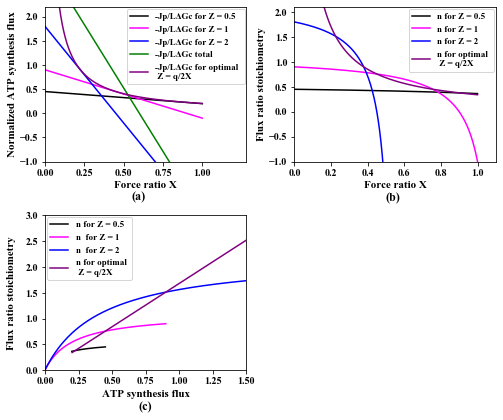

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
cm = 1/2.54
fig = plt.figure(figsize = (18*cm,15*cm))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1)


ax1.plot(figure_2["X"],figure_2["-Jp/LΔGc for Z = 0.5"],color='black',label = "-Jp/LΔGc for Z = 0.5")
ax1.plot(figure_2["X"],figure_2["-Jp/LΔGc for Z = 1"],color='magenta',label = "-Jp/LΔGc for Z = 1")
ax1.plot(figure_2["X"],figure_2["-Jp/LΔGc for Z = 2"],color='blue',label = "-Jp/LΔGc for Z = 2")
# ax1.plot(figure_2["X"],figure_3["-Jp/LΔGc for Z = 4"],color='red',label = "-Jp/LΔGc for Z = 4")
ax1.plot(figure_2["X"],figure_2["-Jp/LΔGc total"],color='green',label = "-Jp/LΔGc total")
ax1.plot(figure_2["X"],figure_2["-Jp/LΔGc for Optimal Z = q/2X"],color='purple',label = "-Jp/LΔGc for optimal \n Z = q/2X")

ax1.legend(prop={"size":9}, loc='upper right', borderaxespad=0.2)
ax1.text(0.55, -1.8, '(a)',  fontsize = 12, color ="black")
# ax1.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 10,fontweight = "bold")
ax1.set_yticks(np.arange(-1.0, 2.5, step=0.5))
ax1.set_xticks(np.arange(-0.0, 1.25, step=0.25))
ax1.set_ylim(-1.0, 2.2)
ax1.set_xlim (0,1.28)
ax1.yaxis.set_tick_params(labelsize=10)
ax1.xaxis.set_tick_params(labelsize=10)
ax1.set_xlabel("Force ratio X", fontsize = 11, fontweight = "bold",labelpad=3)
ax1.set_ylabel("Normalized ATP synthesis flux", fontsize = 11, fontweight = "bold",labelpad=3)

ax2.plot(figure_2["X"],figure_2["-Jp/Jc for Z = 0.5"],color='black',label = "n for Z = 0.5")
ax2.plot(figure_2["X"],figure_2["-Jp/Jc for Z = 1"],color='magenta',label = "n for Z = 1")
ax2.plot(figure_2_x["X"],figure_2_x["-Jp/Jc for Z = 2"],color='blue',label = "n for Z = 2")
# ax2.plot(figure_3["X"],figure_3["-Jp/Jc for Z = 4"],color='red',label = "n for Z = 4")
# ax.plot(figure_3["X"],figure_3["-Jp/Jc total"],color='green',label = "-Jp/Jc total")
ax2.plot(figure_2["X"],figure_2["-Jp/Jc for Optimal Z = q/2X"],color='purple', label = "n for optimal \n Z = q/2X")

ax2.legend(prop={"size":9}, loc='upper right', borderaxespad=0.2)
ax2.text(0.50, -1.8, '(b)',  fontsize = 12, color ="black")
# ax2.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 10,fontweight = "bold")
ax2.set_yticks(np.arange(-1.0, 2.5, step=0.5))
ax2.set_ylim(-1.0, 2.1)
ax2.set_xlim (0,1.1)
ax2.yaxis.set_tick_params(labelsize=10)
ax2.xaxis.set_tick_params(labelsize=10)
ax2.set_xlabel("Force ratio X", fontsize = 11, fontweight = "bold",labelpad=3)
ax2.set_ylabel("Flux ratio stoichiometry", fontsize = 11, fontweight = "bold",labelpad=3)


ax3.plot(figure_2["-Jp/LΔGc for Z = 0.5"],figure_2["-Jp/Jc for Z = 0.5"],color='black',label = "n for Z = 0.5")
ax3.plot(figure_2["-Jp/LΔGc for Z = 1"],figure_2["-Jp/Jc for Z = 1"],color='magenta',label = "n  for Z = 1")
ax3.plot(figure_2["-Jp/LΔGc for Z = 2"],figure_2["-Jp/Jc for Z = 2"],color='blue',label = "n  for Z = 2")
# ax3.plot(figure_3["-Jp/LΔGc for Z = 4"],figure_3["-Jp/Jc for Z = 4"],color='red',label = "n  for Z = 4")
ax3.plot(figure_2["-Jp/LΔGc for Optimal Z = q/2X"],figure_2["-Jp/Jc for Optimal Z = q/2X"],color='purple',label = "n for optimal \n Z = q/2X")

ax3.legend(prop={"size":9,"weight":"bold"}, loc='upper left', borderaxespad=0.2)
ax3.text(0.7, -0.77, '(c)',  fontsize = 12, color ="black")

ax3.set_yticks(np.arange(0, 3.1, step=0.5))

ax3.set_xticks(np.arange(0, 1.51, step=0.25))
ax3.yaxis.set_tick_params(labelsize=10)
ax3.xaxis.set_tick_params(labelsize=10)
ax3.set_ylim([-0,3])
ax3.set_xlim ([0,1.5])
ax3.set_xlabel("ATP synthesis flux", fontsize = 11, fontweight = "bold",labelpad=3)
ax3.set_ylabel("Flux ratio stoichiometry", fontsize = 11, fontweight = "bold",labelpad=9)

matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
# matplotlib.rc('ytick', labelsize=12)

plt.tight_layout()

plt.savefig('Figure 2.png', dpi=1000)
plt.show()

# Figure 3. Simulated ATP synthesis flux through a dual pathway
- In these simulations both Z and q varied as a function of φ, which was kept constant at any of four values, while Χ was varied. The equation (9) was used for simulation of -Jp/(L∙∆Gc) as function of force ratio Χ. In these simulations, n1= 1 and n2= 3, L= 1, ∆Gc = 1, Lp^l=0 , whilst various values of φ (1, 0.375, 0.25 and 0) were used. φ is the catalytic activity of pathway 1 as compared to pathway 2.

In [7]:
x = np.linspace(0,1,401)
figure_3 = pd.DataFrame({"X":x})
figure_3["-Jp/LΔGc φ = 1"] = 0
figure_3["-Jp/LΔGc φ = 0.375"] = 0
figure_3["-Jp/LΔGc φ = 0.25"] = 0
figure_3["-Jp/LΔGc φ = 0"] = 0
φ1 = 1
φ2 =0.375
φ3=0.25
φ4=0
n1 = 1
n2 = 3

for i in range(len(figure_3)):
    # The formula -Jp/(L∆Gc)= (1-φ)∙n1∙(1-n1∙X)+φ∙n2-φ∙(n2 )^2∙X was used for calculation of -Jp/(L∆Gc).
    figure_3["-Jp/LΔGc φ = 1"].iloc[i] = (1-φ1)*n1*(1-n1*figure_3["X"].iloc[i]) + φ1*n2*(1-n2*figure_3["X"].iloc[i])
    figure_3["-Jp/LΔGc φ = 0.375"].iloc[i] = (1-φ2)*n1*(1-n1*figure_3["X"].iloc[i]) + φ2*n2*(1-n2*figure_3["X"].iloc[i])
    figure_3["-Jp/LΔGc φ = 0.25"].iloc[i] = (1-φ3)*n1*(1-n1*figure_3["X"].iloc[i]) + φ3*n2*(1-n2*figure_3["X"].iloc[i])
    figure_3["-Jp/LΔGc φ = 0"].iloc[i] = (1-φ4)*n1*(1-n1*figure_3["X"].iloc[i]) + φ4*n2*(1-n2*figure_3["X"].iloc[i])

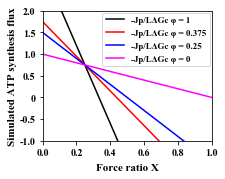

In [8]:
import matplotlib
import matplotlib.pyplot as plt
# fig,axs = plt.subplots(3,1,figsize = (8.5*cm,26*cm))
cm = 1/2.54
fig, ax = plt.subplots(figsize=(8.2*cm, 8.0*cm), sharey=True)
fig.subplots_adjust(bottom=0.6, right=0.8)
formatter = matplotlib.ticker.FormatStrFormatter('%1.3f')#This one is used to set the accurate of y axis
ax.yaxis.set_major_formatter(formatter)
ax.plot(figure_3["X"],figure_3["-Jp/LΔGc φ = 1"],color='black',label = "-Jp/LΔGc φ = 1")
ax.plot(figure_3["X"],figure_3["-Jp/LΔGc φ = 0.375"],color='red',label = "-Jp/LΔGc φ = 0.375")
ax.plot(figure_3["X"],figure_3["-Jp/LΔGc φ = 0.25"],color='blue',label = "-Jp/LΔGc φ = 0.25")
ax.plot(figure_3["X"],figure_3["-Jp/LΔGc φ = 0"],color='magenta',label = "-Jp/LΔGc φ = 0")

plt.legend(prop={"size":9}, loc='upper right', borderaxespad=0.2)

ax.set_yticklabels(["-1.0","-0.5","0","0.5","1.0","1.5","2.0"],fontsize = 10,fontweight = "bold")
plt.xticks(fontsize = 10,fontweight = "bold")
ax.set_ylim(-1.0, 2)
ax.set_xlim (0,1.0)
ax.set_xlabel("Force ratio X", fontsize = 11, fontweight = "bold",labelpad=6)
ax.set_ylabel("Simulated ATP synthesis flux", fontsize = 11, fontweight = "bold",labelpad=3)
plt.tight_layout()
plt.savefig('Figure 3.png', dpi=1000)
plt.show()

# Figure 4. Discontinuous optimal gear shifting
ATP synthesis as function of counteracting force ratio for 4 different stoichiometries, all together, as well as the optimal gear shifting case with the corresponding gear settings. The equation -Jp=(1-φ)∙n∙L∙∆G_c∙(1-n∙X)  was used for simulation of -Jp as function of force ratio Χ at four fixed values of n. In these simulations, n1, n2,n3 and n4 were taken equal to 1, 2, 3 and 4, φ = 0, L = 1, ∆Gc= 1. Jp(total) is the sum of the four Jp’s. The yellow line (consisting of four smaller straight lines at angles with each other) represents the effect of operating always (i.e. at any force ratio Χ) only a single one of the four gears, i.e. the one with the highest flux of ATP synthesis. The difference of the optimal gear setting with that of Figure 2a is that the shifting is not continuous but only between integer values of Z as shown by the purple line labelled ‘gear’.

## Figure 4

In [9]:
x = np.linspace(0,1,401)
figure_4 = pd.DataFrame({"X":x})
figure_4["-Jp n = 1"] = 0
figure_4["-Jp n = 2"] = 0
figure_4["-Jp n = 3"] = 0
figure_4["-Jp n = 4"] = 0
figure_4["-Jp total"] = 0
figure_4["-Jp optimal gear shifting"] = 0
figure_4["gear"] = 0
n1 = 1
n2 = 2
n3 = 3
n4 = 4

for i in range(len(figure_4)):
    # The formula -Jp=(1-φ)∙n∙L∙∆Gc∙(1-n∙X) was used to calculate -Jp,here φ = 0, L= 1, ∆Gc = 1.
    figure_4["-Jp n = 1"].iloc[i] = n1*(1-n1*figure_4["X"].iloc[i])
    figure_4["-Jp n = 2"].iloc[i] = n2*(1-n2*figure_4["X"].iloc[i])
    figure_4["-Jp n = 3"].iloc[i] = n3*(1-n3*figure_4["X"].iloc[i])
    figure_4["-Jp n = 4"].iloc[i] = n4*(1-n4*figure_4["X"].iloc[i])
    figure_4["-Jp total"].iloc[i] = figure_4["-Jp n = 1"].iloc[i]+figure_4["-Jp n = 2"].iloc[i]+figure_4["-Jp n = 3"].iloc[i]+figure_4["-Jp n = 4"].iloc[i]
    figure_4["-Jp optimal gear shifting"].iloc[i] = max(figure_4["-Jp n = 1"].iloc[i],figure_4["-Jp n = 2"].iloc[i],figure_4["-Jp n = 3"].iloc[i],figure_4["-Jp n = 4"].iloc[i])
for i in range(len(figure_4)):
    if i <65:
        figure_4["gear"].iloc[i] = 4
    elif 65<=i<89:
        figure_4["gear"].iloc[i] = 3
    elif 89<=i<136:
        figure_4["gear"].iloc[i] = 2
    else:
        figure_4["gear"].iloc[i] = 1

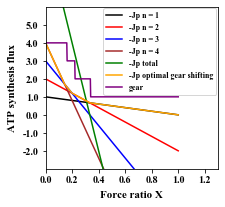

In [10]:
import matplotlib
import matplotlib.pyplot as plt
cm = 1/2.54
fig, ax = plt.subplots(figsize=(8.2*cm, 8.0*cm), sharey=True)
# fig, ax = plt.subplots(figsize=(8, 6), sharey=True)
fig.subplots_adjust(bottom=0.6, right=0.8)

formatter = matplotlib.ticker.FormatStrFormatter('%1.1f')#This one is used to set the accurate of y axis
ax.yaxis.set_major_formatter(formatter)
ax.plot(figure_4["X"],figure_4["-Jp n = 1"],color='black',label = "-Jp n = 1")
ax.plot(figure_4["X"],figure_4["-Jp n = 2"],color='red',label = "-Jp n = 2")
ax.plot(figure_4["X"],figure_4["-Jp n = 3"],color='blue',label  = "-Jp n = 3")
ax.plot(figure_4["X"],figure_4["-Jp n = 4"],color='brown',label = "-Jp n = 4")
ax.plot(figure_4["X"],figure_4["-Jp total"],color='green',label = "-Jp total")
ax.plot(figure_4["X"],figure_4["-Jp optimal gear shifting"],color='orange', label = "-Jp optimal gear shifting")
ax.plot(figure_4["X"],figure_4["gear"],color='purple',label = "gear")

plt.legend(prop={"size":8}, loc='upper right', borderaxespad=0.2)

plt.xticks(fontsize = 10,fontweight = "bold")
ax.set_ylim(-3.0,6)
ax.set_xlim (0,1.3)

ax.set_yticks(np.arange(-2.0, 5.1, step=1.0))
ax.set_xticks(np.arange(0.0, 1.3, step=0.2))
# ax.set_yticklabels(["-2.0","-1.0","0","1.0","2.0","3","4","5"],fontsize = 10,fontweight = "bold")
ax.set_xlabel("Force ratio X", fontsize = 11, fontweight = "bold",labelpad=6)
ax.set_ylabel("ATP synthesis flux", fontsize = 11, fontweight = "bold",labelpad=6)
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
plt.tight_layout()
plt.savefig('Figure 4.png', dpi=1000)
plt.show()